In [2]:
from numpy import *
import numpy as np
import operator

In [3]:
def createDataSet():
    group = np.array([[1.0 , 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
group, labels = createDataSet()

In [12]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    print (diffMat)
    sqDiffMat = diffMat ** 2
    sqDistance = sqDiffMat.sum(axis=1)
    print (sqDistance)
    distance = sqDistance**0.5
    sortedDistance = distance.argsort()
    classCount = {}
    for i in range (k):
        voteIlabel = labels[sortedDistance[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [13]:
classify0([0, 0], group, labels, 3)

[[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]
[ 2.21  2.    0.    0.01]


'B'

In [20]:
def file2Martix(fileName):
    fr = open(fileName)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    print (type(arrayOLines))
    print(numberOfLines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = [ ]
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromeLine = line.split('\t')
        returnMat[index, :] = listFromeLine[0:3]
        classLabelVector.append(int(listFromeLine[-1]))
        index += 1
    return returnMat, classLabelVector 

In [27]:
dateingDataMat, datingLabels = file2Martix("./datingTestSet2.txt")
print (dateingDataMat)

<class 'list'>
1000
[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]


In [28]:
import matplotlib
import matplotlib.pyplot as plt

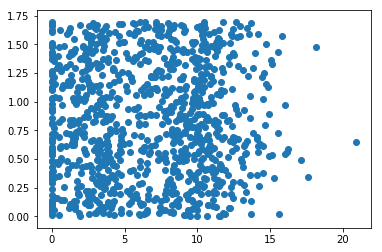

In [29]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.scatter(dateingDataMat[:,1], dateingDataMat[:, 2])
plt.show()
    

In [32]:
a = np.arange(24)
b = a.reshape(2, 3, 4)
print(b)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [34]:
b[:, 0]

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

In [35]:
b[:, :, 0]

array([[ 0,  4,  8],
       [12, 16, 20]])